In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
sys.path.append("/Users/yamamura/Documents/workspace/research/voice_study/linear_attention_copytask")
plt.rcParams["font.size"] = 18

In [2]:
dim_lst = [256, 512, 1024]
head_lst = [8, 16]
depth_lst = [4]
ff_lst = [256, 512, 1024]
pos_lst = [64, 10000]
attn_type = ["linear", "full", "linear_attn_elu"]

## loss graph

In [3]:
# path = glob.glob("./from_colab/output_full/*.csv")
dim = 1024
head = 8
depth = 4
ff = 512
pos = 256

path_linear = "./from_server/output_linear/linear_poslen_{}_dim_{}_ffhidnum_{}_head_{}_depth_{}_loss.csv".format(pos, dim, ff, head, depth)
path_full = "./from_server/output_full/full_poslen_{}_dim_{}_ffhidnum_{}_head_{}_depth_{}_loss.csv".format(pos, dim, ff, head, depth)
path_elu = "./from_server/output_linear_attn_elu/linear_attn_elu_poslen_{}_dim_{}_ffhidnum_{}_head_{}_depth_{}_loss.csv".format(pos, dim, ff, head, depth)
# np.loadtxt()

loss_linear = np.loadtxt(path_linear,  delimiter=',')
loss_full = np.loadtxt(path_full,  delimiter=',')
loss_elu = np.loadtxt(path_elu,  delimiter=',')


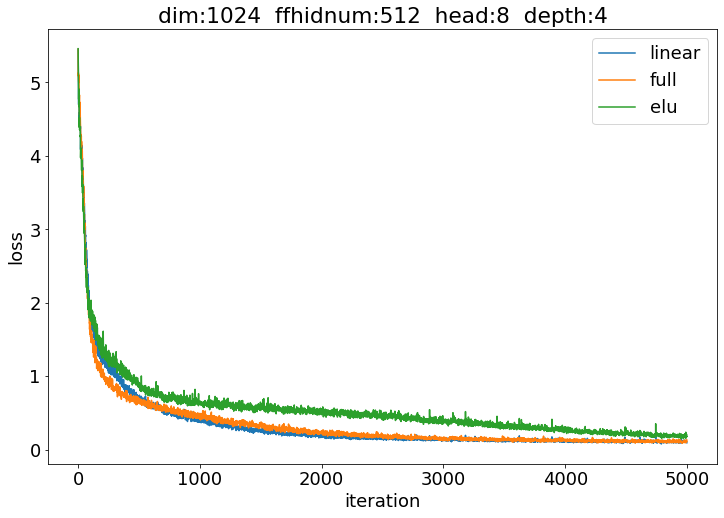

In [6]:
ppp = "./from_colab/poslen_{}_dim_{}_ffhidnum_{}_head_{}_depth_{}.png".format(pos, dim, ff, head, depth)
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("dim:{}  ffhidnum:{}  head:{}  depth:{}".format(dim, ff, head, depth))
ax.plot(loss_linear, label = "linear")
ax.plot(loss_full, label = "full")
ax.plot(loss_elu, label = "elu")
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
plt.legend()
plt.show()



- eluの収束が少し遅いけど、fullとlinearの収束は同じような推移を辿る
    - ノイズをなくすという簡単なタスクであれば、fullとlinear(softmax)は同じような振る舞いをする。
    - fullと同じパラメータを使えばlinearでもある程度学習をすることはできそうな雰囲気があるが。。。という気分
        - 一方、コピータスクをした時は、linearの方がだいぶしんどそうだったので、タスク依存なところは大きいかもしれない。。。
    - 一方、eluに関しては、少しパラメータの工夫が必要になるかもしれない

In [81]:
import re

# dim = 1024
# head = 8
# depth = 4
# ff = 1024
# pos = 1000

path_linear_txt = "./from_colab/output_linear/linear_poslen_{}_dim_{}_ffhidnum_{}_head_{}_depth_{}.txt".format(pos, dim, ff, head, depth)
path_full_txt = "./from_colab/output_full/full_poslen_{}_dim_{}_ffhidnum_{}_head_{}_depth_{}.txt".format(pos, dim, ff, head, depth)
path_elu_txt = "./from_colab/output_elu/output_linear_attn_elu/linear_attn_elu_poslen_{}_dim_{}_ffhidnum_{}_head_{}_depth_{}.txt".format(pos, dim, ff, head, depth)

linear = []
elu = []
full = []

with open(path_elu_txt) as f:
    for i, line in enumerate(f):
        if "incorrects" in line:
            num = int(re.findall(r"incorrects: ([0-9]+)", line)[0])
            elu.append(num)
with open(path_full_txt) as f:
    for i, line in enumerate(f):
        if "incorrects" in line:
            num = int(re.findall(r"incorrects: ([0-9]+)", line)[0])
            full.append(num)
with open(path_linear_txt) as f:
    for i, line in enumerate(f):
        if "incorrects" in line:
            num = int(re.findall(r"incorrects: ([0-9]+)", line)[0])
            linear.append(num)
a = 32*10

print("full : {}".format(sum(full)/a))
print("linear : {}".format(sum(linear)/a))
print("elu : {}".format(sum(elu)/a))
            

full : 0.05
linear : 0.0
elu : 0.065625


In [84]:
full

[0, 2, 0, 0, 0, 9, 0, 0, 0, 5]

## embedding sizeごとのloss

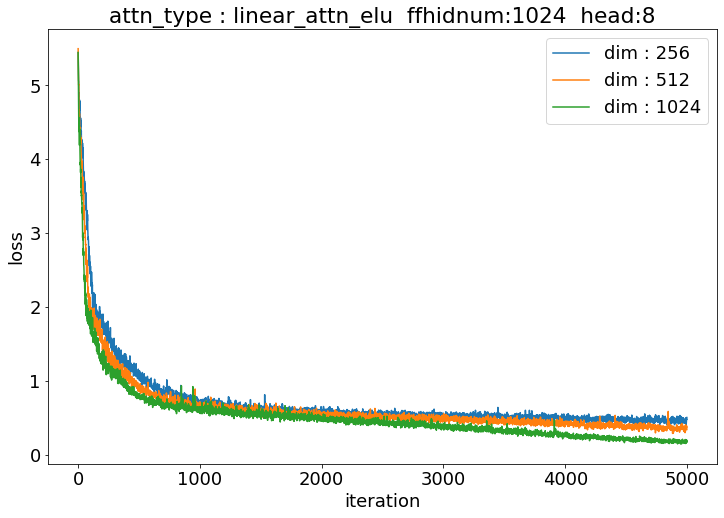

In [10]:
dim_lst = [256,512,1024]
head = 8
depth = 4
ff = 1024
pos = 256
# attn_type = "full"
# attn_type = "linear"
attn_type = "linear_attn_elu"

loss_lst = []

for dim in dim_lst:
    if attn_type != "linear_attn_elu":
        pt = "./from_server/output_{0}/{0}_poslen_{1}_dim_{2}_ffhidnum_{3}_head_{4}_depth_{5}_loss.csv".format(attn_type, pos, dim, ff, head, depth)
    else:
        pt = "./from_server/output_linear_attn_elu/{0}_poslen_{1}_dim_{2}_ffhidnum_{3}_head_{4}_depth_{5}_loss.csv".format(attn_type, pos, dim, ff, head, depth)
    l = np.loadtxt(pt,  delimiter=',')
    loss_lst.append(l)

    
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title("attn_type : {}  ffhidnum:{}  head:{}".format(attn_type, ff, head))
for i, l in enumerate(loss_lst):
    ax.plot(l, label = "dim : {}".format(dim_lst[i]))
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
plt.legend()
plt.show()

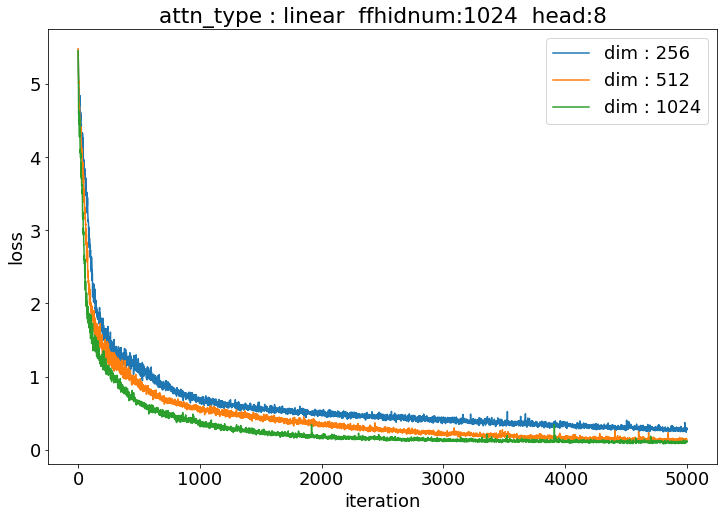

In [11]:
dim_lst = [256,512,1024]
head = 8
depth = 4
ff = 1024
pos = 256
# attn_type = "full"
attn_type = "linear"
# attn_type = "linear_attn_elu"

loss_lst = []

for dim in dim_lst:
    if attn_type != "linear_attn_elu":
        pt = "./from_server/output_{0}/{0}_poslen_{1}_dim_{2}_ffhidnum_{3}_head_{4}_depth_{5}_loss.csv".format(attn_type, pos, dim, ff, head, depth)
    else:
        pt = "./from_server/output_linear_attn_elu/{0}_poslen_{1}_dim_{2}_ffhidnum_{3}_head_{4}_depth_{5}_loss.csv".format(attn_type, pos, dim, ff, head, depth)
    l = np.loadtxt(pt,  delimiter=',')
    loss_lst.append(l)

    
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title("attn_type : {}  ffhidnum:{}  head:{}".format(attn_type, ff, head))
for i, l in enumerate(loss_lst):
    ax.plot(l, label = "dim : {}".format(dim_lst[i]))
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
plt.legend()
plt.show()

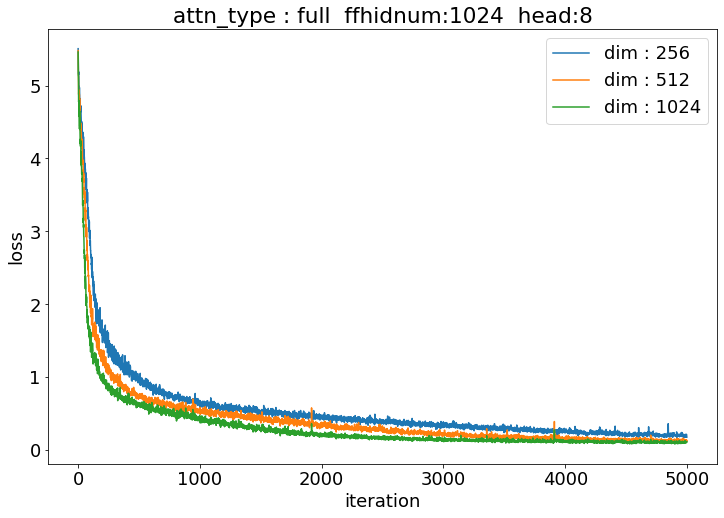

In [12]:
dim_lst = [256,512,1024]
head = 8
depth = 4
ff = 1024
pos = 256
attn_type = "full"
# attn_type = "linear"
# attn_type = "linear_attn_elu"

loss_lst = []

for dim in dim_lst:
    if attn_type != "linear_attn_elu":
        pt = "./from_server/output_{0}/{0}_poslen_{1}_dim_{2}_ffhidnum_{3}_head_{4}_depth_{5}_loss.csv".format(attn_type, pos, dim, ff, head, depth)
    else:
        pt = "./from_server/output_linear_attn_elu/{0}_poslen_{1}_dim_{2}_ffhidnum_{3}_head_{4}_depth_{5}_loss.csv".format(attn_type, pos, dim, ff, head, depth)
    l = np.loadtxt(pt,  delimiter=',')
    loss_lst.append(l)

    
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title("attn_type : {}  ffhidnum:{}  head:{}".format(attn_type, ff, head))
for i, l in enumerate(loss_lst):
    ax.plot(l, label = "dim : {}".format(dim_lst[i]))
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
plt.legend()
plt.show()

潜在次元は大きい方がlossは小さくなる。特に、早くなる

## ffhidnumごと

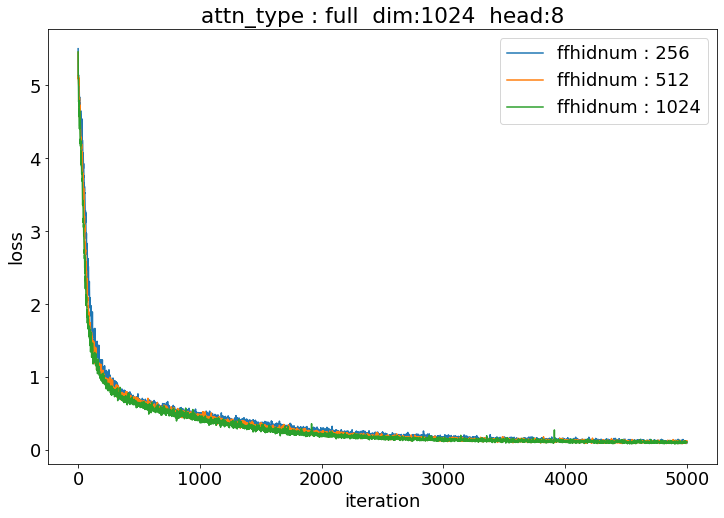

In [13]:
dim = 1024
head = 8
depth = 4
ff_list = [256, 512, 1024]
pos = 256
# attn_type = "linear_attn_elu"
attn_type = "full"

loss_lst = []

for ff in ff_list:
    if attn_type != "linear_attn_elu":
        pt = "./from_server/output_{0}/{0}_poslen_{1}_dim_{2}_ffhidnum_{3}_head_{4}_depth_{5}_loss.csv".format(attn_type, pos, dim, ff, head, depth)
    else:
        pt = "./from_server/output_linear_attn_elu/{0}_poslen_{1}_dim_{2}_ffhidnum_{3}_head_{4}_depth_{5}_loss.csv".format(attn_type, pos, dim, ff, head, depth)
    l = np.loadtxt(pt,  delimiter=',')
    loss_lst.append(l)

plt.rcParams["font.size"] = 18
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("attn_type : {}  dim:{}  head:{}".format(attn_type, dim, head))
for i, l in enumerate(loss_lst):
    ax.plot(l, label = "ffhidnum : {}".format(ff_list[i]))
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
plt.legend()
plt.show()

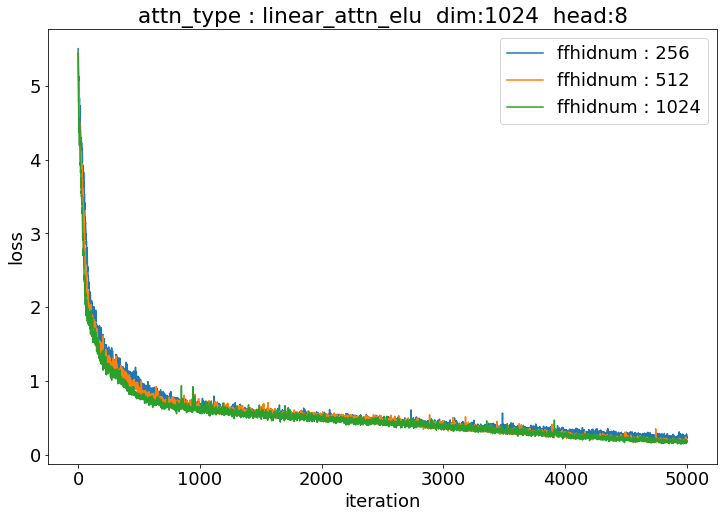

In [15]:
dim = 1024
head = 8
depth = 4
ff_list = [256, 512, 1024]
pos = 256
attn_type = "linear_attn_elu"
# attn_type = "full"

loss_lst = []

for ff in ff_list:
    if attn_type != "linear_attn_elu":
        pt = "./from_server/output_{0}/{0}_poslen_{1}_dim_{2}_ffhidnum_{3}_head_{4}_depth_{5}_loss.csv".format(attn_type, pos, dim, ff, head, depth)
    else:
        pt = "./from_server/output_linear_attn_elu/{0}_poslen_{1}_dim_{2}_ffhidnum_{3}_head_{4}_depth_{5}_loss.csv".format(attn_type, pos, dim, ff, head, depth)
    l = np.loadtxt(pt,  delimiter=',')
    loss_lst.append(l)

plt.rcParams["font.size"] = 18
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("attn_type : {}  dim:{}  head:{}".format(attn_type, dim, head))
for i, l in enumerate(loss_lst):
    ax.plot(l, label = "ffhidnum : {}".format(ff_list[i]))
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
plt.legend()
plt.show()

- ffhidnumは(このタスクにおいては)あんま関係なさそう。
    - 圧縮すべきデータが小さいため？

## incorrect

生成時にincorrectなデータ数の平均値をモデルごとに出す

In [100]:
import re

dim = 1024
head = 8
depth = 4
ff = 256
pos = 1000

path_linear_txt = "./from_colab/output_linear/linear_poslen_{}_dim_{}_ffhidnum_{}_head_{}_depth_{}.txt".format(pos, dim, ff, head, depth)
path_full_txt = "./from_colab/output_full/full_poslen_{}_dim_{}_ffhidnum_{}_head_{}_depth_{}.txt".format(pos, dim, ff, head, depth)
path_elu_txt = "./from_colab/output_elu/output_linear_attn_elu/linear_attn_elu_poslen_{}_dim_{}_ffhidnum_{}_head_{}_depth_{}.txt".format(pos, dim, ff, head, depth)

linear = []
elu = []
full = []

with open(path_elu_txt) as f:
    for i, line in enumerate(f):
        if "incorrects" in line:
            num = int(re.findall(r"incorrects: ([0-9]+)", line)[0])
            elu.append(num)
with open(path_full_txt) as f:
    for i, line in enumerate(f):
        if "incorrects" in line:
            num = int(re.findall(r"incorrects: ([0-9]+)", line)[0])
            full.append(num)
with open(path_linear_txt) as f:
    for i, line in enumerate(f):
        if "incorrects" in line:
            num = int(re.findall(r"incorrects: ([0-9]+)", line)[0])
            linear.append(num)
a = 32*10

print("full : {}".format(sum(full)/a))
print("linear : {}".format(sum(linear)/a))
print("elu : {}".format(sum(elu)/a))
            

full : 0.0
linear : 0.0
elu : 0.0625


In [6]:
plt.plot(loss)

NameError: name 'loss' is not defined